In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

%matplotlib inline

In [2]:
percentage_list = np.linspace(10,100,num=10,dtype=np.int)
percentage_list

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

# Evacuation Scenario

In [3]:
waiting_mean = []
waiting_sdev = []
in_lift_mean = []
in_lift_sdev = []
total_mean = []
total_sdev = []
count = []
end_time = []
for per in percentage_list:
    df = pd.read_csv("analysis_log/evac_all_attendance_{}.log".format(per),names=["name","start_time","end_time","from","to","waiting","in_lift","total"])
    df_desc = df.describe()
    waiting_mean.append(df_desc.loc["mean","waiting"])
    waiting_sdev.append(df_desc.loc["std","waiting"])
    in_lift_mean.append(df_desc.loc["mean","in_lift"])
    in_lift_sdev.append(df_desc.loc["std","in_lift"])
    total_mean.append(df_desc.loc["mean","total"])
    total_sdev.append(df_desc.loc["std","total"])
    count.append(df_desc.loc["count","name"])
    end_time.append(df_desc.loc["max","end_time"])

In [4]:
for x in range(101):
    if x in range(len(percentage_list)):
        print(percentage_list[x])
waiting_mean    

10
20
30
40
50
60
70
80
90
100


[26.360759493670887,
 49.690140845070424,
 54.717842323651453,
 74.599374021909227,
 88.93564356435644,
 119.61530715005036,
 134.31737588652481,
 146.95962732919256,
 171.36481861738534,
 195.50705088902515]

In [5]:
results = sm.OLS(waiting_mean,sm.add_constant(percentage_list)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     831.7
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           2.26e-09
Time:                        08:51:37   Log-Likelihood:                -30.674
No. Observations:                  10   AIC:                             65.35
Df Residuals:                       8   BIC:                             65.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.7041      3.971      1.185      0.2

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


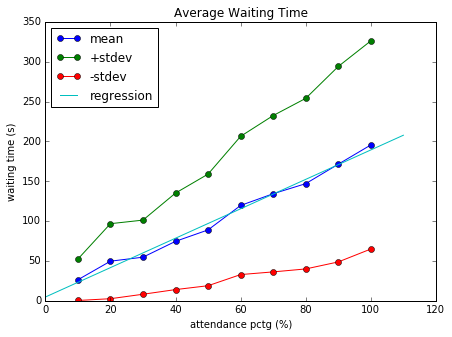

In [6]:
#plt.plot(np.array(range(10))+1,waiting_mean,"-o")
from matplotlib.ticker import FuncFormatter, MaxNLocator

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(percentage_list,waiting_mean,"-o",label="mean")
ax.plot(percentage_list,np.array(waiting_mean)+np.array(waiting_sdev),"-o",label="+stdev")
ax.plot(percentage_list,np.array(waiting_mean)-np.array(waiting_sdev),"-o",label="-stdev")
# plot the regression line
X_plot = np.linspace(0,110)
ax.plot(X_plot, X_plot*results.params[1] + results.params[0],label="regression")
ax.set_xlabel("attendance pctg (%)")
ax.set_ylabel("waiting time (s)")
ax.legend(loc="upper left")
ax.set_title("Average Waiting Time")

#ax.set_xlim(dates_list[0],dates_list[-1])

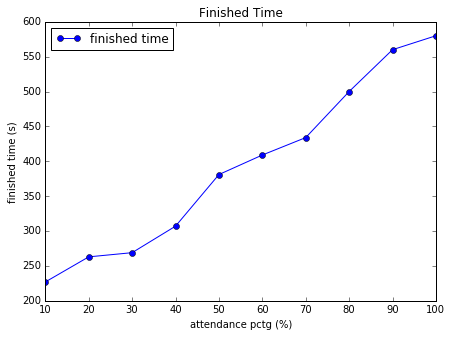

In [7]:
#plt.plot(np.array(range(10))+1,waiting_mean,"-o")
from matplotlib.ticker import FuncFormatter, MaxNLocator

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(percentage_list,end_time,"-o",label="finished time")
# plot the regression line
X_plot = np.linspace(0,110)
ax.set_xlabel("attendance pctg (%)")
ax.set_ylabel("finished time (s)")
ax.legend(loc="upper left")
ax.set_title("Finished Time")

#ax.set_xlim(dates_list[0],dates_list[-1])

In [8]:
results = sm.OLS(in_lift_mean,sm.add_constant(percentage_list)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     39.82
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           0.000230
Time:                        08:51:37   Log-Likelihood:                -20.454
No. Observations:                  10   AIC:                             44.91
Df Residuals:                       8   BIC:                             45.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         30.4938      1.429     21.340      0.0

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


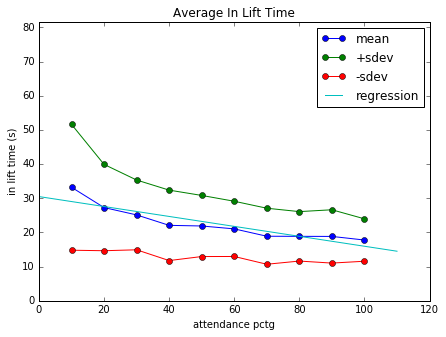

In [9]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(percentage_list,in_lift_mean,"-o",label="mean")
ax.plot(percentage_list,np.array(in_lift_mean)+np.array(in_lift_sdev),"-o",label="+sdev")
ax.plot(percentage_list,np.array(in_lift_mean)-np.array(in_lift_sdev),"-o",label="-sdev")
# regression line
X_plot = np.linspace(0,110)
ax.plot(X_plot, X_plot*results.params[1] + results.params[0],label="regression")
#ax.set_xlim(0,12)
ax.set_ylim(0,max(np.array(in_lift_mean)+np.array(in_lift_sdev))+30)
ax.set_xlabel("attendance pctg")
ax.set_ylabel("in lift time (s)")
ax.legend(loc="upper right")
ax.set_title("Average In Lift Time")
#ax.set_xlim(dates_list[0],dates_list[-1])

# Batch Registration Scenario

In [10]:
waiting_mean = []
waiting_sdev = []
in_lift_mean = []
in_lift_sdev = []
total_mean = []
total_sdev = []
count = []
end_time = []
for per in percentage_list:
    df = pd.read_csv("analysis_log/batch_reg_all_attendance_{}.log".format(per),names=["name","start_time","end_time","from","to","waiting","in_lift","total"])
    df_desc = df.describe()
    waiting_mean.append(df_desc.loc["mean","waiting"])
    waiting_sdev.append(df_desc.loc["std","waiting"])
    in_lift_mean.append(df_desc.loc["mean","in_lift"])
    in_lift_sdev.append(df_desc.loc["std","in_lift"])
    total_mean.append(df_desc.loc["mean","total"])
    total_sdev.append(df_desc.loc["std","total"])
    count.append(df_desc.loc["count","name"])
    end_time.append(df_desc.loc["max","end_time"])

In [11]:
results = sm.OLS(waiting_mean,sm.add_constant(percentage_list)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8436.
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           2.20e-13
Time:                        08:51:38   Log-Likelihood:                -31.825
No. Observations:                  10   AIC:                             67.65
Df Residuals:                       8   BIC:                             68.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -47.1532      4.455    -10.584      0.0

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


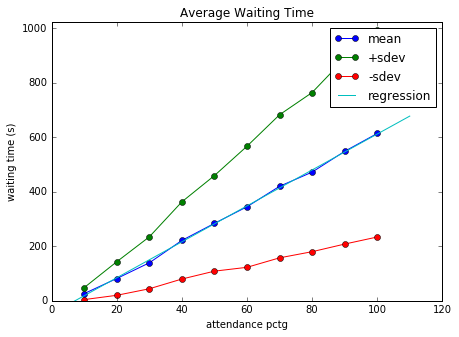

In [12]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(percentage_list,waiting_mean,"-o",label="mean")
ax.plot(percentage_list,np.array(waiting_mean)+np.array(waiting_sdev),"-o",label="+sdev")
ax.plot(percentage_list,np.array(waiting_mean)-np.array(waiting_sdev),"-o",label="-sdev")
# regression line
X_plot = np.linspace(0,110)
ax.plot(X_plot, X_plot*results.params[1] + results.params[0],label="regression")
#ax.set_xlim(0,12)
ax.set_ylim(0,max(np.array(waiting_mean)+np.array(waiting_sdev))+30)
ax.set_xlabel("attendance pctg")
ax.set_ylabel("waiting time (s)")
ax.legend(loc="upper right")
ax.set_title("Average Waiting Time")
#ax.set_xlim(dates_list[0],dates_list[-1])

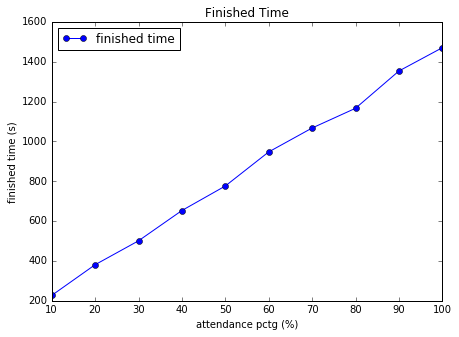

In [13]:
#plt.plot(np.array(range(10))+1,waiting_mean,"-o")
from matplotlib.ticker import FuncFormatter, MaxNLocator

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(percentage_list,end_time,"-o",label="finished time")
# plot the regression line
X_plot = np.linspace(0,110)
ax.set_xlabel("attendance pctg (%)")
ax.set_ylabel("finished time (s)")
ax.legend(loc="upper left")
ax.set_title("Finished Time")
#ax.set_xlim(dates_list[0],dates_list[-1])

In [14]:
results = sm.OLS(in_lift_mean,sm.add_constant(percentage_list)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     12.99
Date:                Thu, 07 Dec 2017   Prob (F-statistic):            0.00694
Time:                        08:51:39   Log-Likelihood:                -18.207
No. Observations:                  10   AIC:                             40.41
Df Residuals:                       8   BIC:                             41.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         43.2595      1.141     37.900      0.0

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


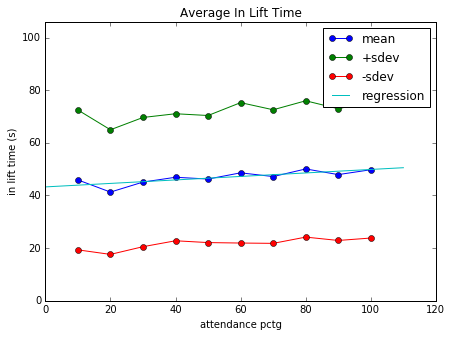

In [15]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(percentage_list,in_lift_mean,"-o",label="mean")
ax.plot(percentage_list,np.array(in_lift_mean)+np.array(in_lift_sdev),"-o",label="+sdev")
ax.plot(percentage_list,np.array(in_lift_mean)-np.array(in_lift_sdev),"-o",label="-sdev")
# regression line
X_plot = np.linspace(0,110)
ax.plot(X_plot, X_plot*results.params[1] + results.params[0],label="regression")
#ax.set_xlim(0,12)
ax.set_ylim(0,max(np.array(in_lift_mean)+np.array(in_lift_sdev))+30)
ax.set_xlabel("attendance pctg")
ax.set_ylabel("in lift time (s)")
ax.legend(loc="upper right")
ax.set_title("Average In Lift Time")
#ax.set_xlim(dates_list[0],dates_list[-1])

# Normal Schedule Scenario

In [16]:
waiting_mean = []
waiting_sdev = []
in_lift_mean = []
in_lift_sdev = []
total_mean = []
total_sdev = []
count = []
end_time = []
for per in percentage_list:
    df = pd.read_csv("analysis_log/normal_sched_all_attendance_{}.log".format(per),names=["name","start_time","end_time","from","to","waiting","in_lift","total"])
    df_desc = df.describe()
    waiting_mean.append(df_desc.loc["mean","waiting"])
    waiting_sdev.append(df_desc.loc["std","waiting"])
    in_lift_mean.append(df_desc.loc["mean","in_lift"])
    in_lift_sdev.append(df_desc.loc["std","in_lift"])
    total_mean.append(df_desc.loc["mean","total"])
    total_sdev.append(df_desc.loc["std","total"])
    count.append(df_desc.loc["count","name"])
    end_time.append(df_desc.loc["max","end_time"])

In [17]:
results = sm.OLS(waiting_mean,sm.add_constant(percentage_list)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     95.10
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           1.02e-05
Time:                        08:51:39   Log-Likelihood:                -29.373
No. Observations:                  10   AIC:                             62.75
Df Residuals:                       8   BIC:                             63.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -4.0237      3.486     -1.154      0.2

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


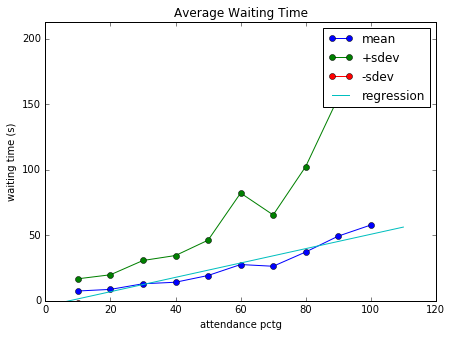

In [18]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(percentage_list,waiting_mean,"-o",label="mean")
ax.plot(percentage_list,np.array(waiting_mean)+np.array(waiting_sdev),"-o",label="+sdev")
ax.plot(percentage_list,np.array(waiting_mean)-np.array(waiting_sdev),"-o",label="-sdev")
# regression line
X_plot = np.linspace(0,110)
ax.plot(X_plot, X_plot*results.params[1] + results.params[0],label="regression")
#ax.set_xlim(0,12)
ax.set_ylim(0,max(np.array(waiting_mean)+np.array(waiting_sdev))+30)
ax.set_xlabel("attendance pctg")
ax.set_ylabel("waiting time (s)")
ax.legend(loc="upper right")
ax.set_title("Average Waiting Time")
#ax.set_xlim(dates_list[0],dates_list[-1])

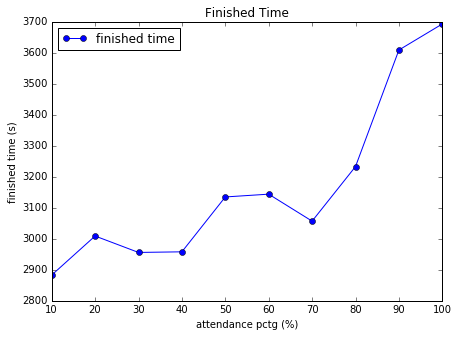

In [19]:
#plt.plot(np.array(range(10))+1,waiting_mean,"-o")
from matplotlib.ticker import FuncFormatter, MaxNLocator

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(percentage_list,end_time,"-o",label="finished time")
# plot the regression line
X_plot = np.linspace(0,110)
ax.set_xlabel("attendance pctg (%)")
ax.set_ylabel("finished time (s)")
ax.legend(loc="upper left")
ax.set_title("Finished Time")
#ax.set_xlim(dates_list[0],dates_list[-1])

In [20]:
results = sm.OLS(in_lift_mean,sm.add_constant(percentage_list)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3.198
Date:                Thu, 07 Dec 2017   Prob (F-statistic):              0.112
Time:                        08:51:40   Log-Likelihood:                -22.901
No. Observations:                  10   AIC:                             49.80
Df Residuals:                       8   BIC:                             50.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         23.8754      1.825     13.081      0.0

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


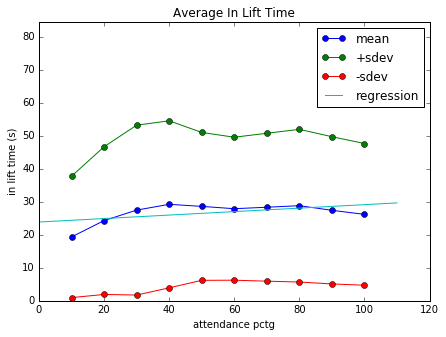

In [21]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(percentage_list,in_lift_mean,"-o",label="mean")
ax.plot(percentage_list,np.array(in_lift_mean)+np.array(in_lift_sdev),"-o",label="+sdev")
ax.plot(percentage_list,np.array(in_lift_mean)-np.array(in_lift_sdev),"-o",label="-sdev")
# regression line
X_plot = np.linspace(0,110)
ax.plot(X_plot, X_plot*results.params[1] + results.params[0],label="regression")
#ax.set_xlim(0,12)
ax.set_ylim(0,max(np.array(in_lift_mean)+np.array(in_lift_sdev))+30)
ax.set_xlabel("attendance pctg")
ax.set_ylabel("in lift time (s)")
ax.legend(loc="upper right")
ax.set_title("Average In Lift Time")
#ax.set_xlim(dates_list[0],dates_list[-1])

In [22]:
df.describe()
#waiting_mean

,name,start_time,end_time,from,to,waiting,in_lift,total
count,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000
mean,845.647964,1077.024434,1161.041176,3.291403,4.365837,57.837783,26.193665,84.031448
std,487.154241,710.359857,697.819497,4.811323,5.356269,125.064007,21.475438,129.719305
min,0.000000,1.000000,43.000000,0.000000,0.000000,1.000000,2.000000,3.000000
25%,426.000000,465.000000,601.000000,0.000000,1.000000,6.000000,10.000000,25.000000
50%,844.000000,965.500000,1044.000000,2.000000,2.000000,21.000000,19.000000,47.000000
75%,1267.000000,1587.000000,1678.000000,2.000000,6.000000,50.000000,38.000000,90.000000
max,1689.000000,3680.000000,3693.000000,19.000000,19.000000,1516.000000,131.000000,1567.000000


In [23]:
evacuate_30 = pd.read_csv("analysis_log/evacuate_attendance_30.log",names=["name","start_time","end_time","from","to","waiting","in_lift","total"],index_col=None)
evacuate_50 = pd.read_csv("analysis_log/evacuate_attendance_50.log",names=["name","start_time","end_time","from","to","waiting","in_lift","total"])
evacuate_80 = pd.read_csv("analysis_log/evacuate_attendance_80.log",names=["name","start_time","end_time","from","to","waiting","in_lift","total"])
evacuate_100 = pd.read_csv("analysis_log/evacuate_attendance_100.log",names=["name","start_time","end_time","from","to","waiting","in_lift","total"])

In [24]:
evacuate_30.head()

,name,start_time,end_time,from,to,waiting,in_lift,total
0,186,9,27,4,0,7,11,18
1,108,10,31,3,0,6,15,21
2,431,28,52,6,0,9,15,24
3,55,21,52,8,0,8,23,31
4,503,37,56,9,0,5,14,19


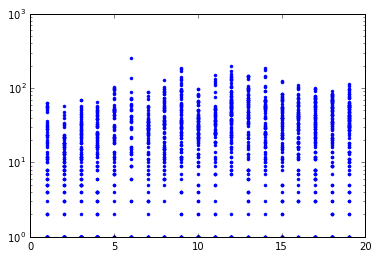

In [25]:
plt.plot(evacuate_100["from"],evacuate_100.waiting,".")
plt.yscale("log")

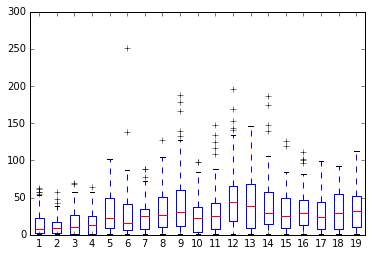

In [26]:
data = []
for x in sorted(evacuate_100["from"].unique()):
    data.append(evacuate_100[evacuate_100["from"]==x].waiting)

bplot = plt.boxplot(data)

In [27]:
test = evacuate_30.describe()
test.loc["mean","in_lift"]

42.80821917808219

In [28]:
evacuate_50.describe()

,name,start_time,end_time,from,to,waiting,in_lift,total
count,792.000000,792.000000,792.000000,792.000000,792.0,792.000000,792.000000,792.000000
mean,428.709596,924.051768,993.375000,9.597222,0.0,20.527778,48.795455,69.323232
std,246.702606,450.645028,455.521759,5.480515,0.0,20.745627,30.335521,41.652849
min,2.000000,9.000000,51.000000,1.000000,0.0,1.000000,3.000000,4.000000
25%,216.750000,582.750000,665.000000,4.000000,0.0,5.000000,23.000000,37.000000
50%,431.500000,928.500000,975.000000,9.000000,0.0,15.000000,44.000000,62.000000
75%,639.250000,1272.000000,1386.000000,14.000000,0.0,28.000000,69.000000,94.250000
max,855.000000,1796.000000,1822.000000,19.000000,0.0,149.000000,143.000000,279.000000


In [29]:
evacuate_80.describe()

,name,start_time,end_time,from,to,waiting,in_lift,total
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.0,1320.000000,1320.000000,1320.000000
mean,686.524242,908.656061,980.283333,9.925758,0.0,25.122727,46.504545,71.627273
std,398.071821,449.611847,450.489063,5.631785,0.0,27.133318,27.336057,40.395999
min,0.000000,7.000000,33.000000,1.000000,0.0,1.000000,2.000000,3.000000
25%,339.750000,566.500000,660.000000,5.000000,0.0,5.000000,25.000000,42.000000
50%,685.500000,895.000000,967.000000,10.000000,0.0,16.000000,42.000000,65.000000
75%,1029.250000,1262.250000,1339.000000,15.000000,0.0,37.000000,63.000000,95.000000
max,1377.000000,1799.000000,1855.000000,19.000000,0.0,184.000000,170.000000,230.000000


In [30]:
evacuate_100.describe()

,name,start_time,end_time,from,to,waiting,in_lift,total
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.0,1584.000000,1584.000000,1584.000000
mean,832.421717,903.964646,977.818182,10.330177,0.0,30.805556,43.047980,73.853535
std,480.491720,447.370413,451.825651,5.575096,0.0,30.831621,24.424628,39.798942
min,0.000000,3.000000,23.000000,1.000000,0.0,1.000000,2.000000,3.000000
25%,422.750000,555.750000,624.000000,5.000000,0.0,7.000000,25.000000,44.000000
50%,833.500000,898.500000,970.000000,10.000000,0.0,22.000000,39.000000,69.000000
75%,1243.250000,1258.000000,1329.000000,15.000000,0.0,45.000000,56.000000,98.000000
max,1663.000000,1799.000000,1857.000000,19.000000,0.0,251.000000,156.000000,303.000000


In [31]:
evacuate_100.groupby(["from","to"]).describe()

end_time     in_lift         name   start_time       total  \
from to                                                                        
1    0  count    69.000000   69.000000    69.000000    69.000000   69.000000   
        mean    991.000000   13.014493   761.449275   962.188406   28.811594   
        std     416.382001    5.491953   455.390186   415.376239   18.656552   
        min     292.000000    2.000000    16.000000   225.000000    3.000000   
        25%     686.000000    8.000000   417.000000   649.000000   16.000000   
        50%    1010.000000   15.000000   726.000000   978.000000   24.000000   
        75%    1311.000000   18.000000  1159.000000  1293.000000   38.000000   
        max    1764.000000   20.000000  1606.000000  1735.000000   75.000000   
2    0  count    86.000000   86.000000    86.000000    86.000000   86.000000   
        mean    925.325581   20.953488   890.755814   892.325581   33.000000   
        std     482.228831    9.069544   469.016140   481.404720   16.976801   
        min      74.000000    3.000000    78.000000    37.000000    4.000000   
        25%     588.750000   14.250000   514.750000   559.750000   20.250000   
        50%     839.000000   22.000000   875.000000   826.000000   33.000000   
        75%    1361.250000   27.000000  1342.750000  1303.750000   41.750000   
        max    1800.000000   38.000000  1626.000000  1789.000000   80.000000   
3    0  count    97.000000   97.000000    97.000000    97.000000   97.000000   
        mean    996.742268   30.556701   944.752577   949.835052   46.907216   
        std     464.832010   14.275539   425.813585   460.326824   23.753545   
        min      23.000000    5.000000    35.000000     3.000000    6.000000   
        25%     686.000000   19.000000   567.000000   637.000000   29.000000   
        50%    1013.000000   30.000000   982.000000   967.000000   45.000000   
        75%    1378.000000   43.000000  1290.000000  1303.000000   62.000000   
        max    1764.000000   55.000000  1649.000000  1683.000000   99.000000   
4    0  count    95.000000   95.000000    95.000000    95.000000   95.000000   
        mean    910.778947   35.694737   813.831579   858.073684   52.705263   
        std     424.253015   16.561988   459.724123   419.845900   23.668757   
        min      34.000000    8.000000    92.000000     7.000000    9.000000   
        25%     584.000000   24.000000   440.000000   535.000000   32.000000   
        50%     894.000000   32.000000   837.000000   866.000000   50.000000   
...                    ...         ...          ...          ...         ...   
16   0  std     440.094638   28.601485   500.800043   445.077951   31.920540   
        min      74.000000   17.000000    26.000000     3.000000   23.000000   
        25%     511.000000   32.000000   335.750000   411.000000   63.750000   
        50%     772.000000   47.000000   737.500000   736.500000   86.000000   
        75%    1231.000000   62.000000  1129.500000  1149.250000  103.250000   
        max    1848.000000  138.000000  1663.000000  1750.000000  159.000000   
17   0  count   100.000000  100.000000   100.000000   100.000000  100.000000   
        mean    985.370000   57.420000   808.040000   897.810000   87.560000   
        std     428.608240   23.733444   478.023158   426.907477   31.306991   
        min     163.000000   20.000000    45.000000    51.000000   33.000000   
        25%     696.000000   43.000000   320.750000   595.750000   62.000000   
        50%     978.000000   55.000000   780.000000   868.500000   84.500000   
        75%    1355.000000   71.250000  1228.250000  1199.000000  106.250000   
        max    1857.000000  150.000000  1652.000000  1799.000000  165.000000   
18   0  count    91.000000   91.000000    91.000000    91.000000   91.000000   
        mean    956.604396   69.307692   888.527473   854.626374  101.978022   
        std     506.712101   29.980991   502.889834   502.864299   37.490140   
        min     17